# IMPORT PACKAGES

In [27]:
import pandas as pd
import numpy as np
import requests
import folium
import re
from geopy.geocoders import Nominatim
import matplotlib.cm as cm
import matplotlib.colors as colors
from pandas.io.json import json_normalize 

# 1. PRE-PROCESSING DATA

# 1.1. DEALING WITH MISSING VALUES

# 1.1.A: LIST OF POSTAL CODES

In [2]:
url = "https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M"
request = requests.get(url)
dataframes=pd.read_html(request.text, header=0)
raw_data = dataframes[0]
raw_data

,Postal Code,Borough,Neighborhood
0,M1A,Not assigned,Not assigned
1,M2A,Not assigned,Not assigned
2,M3A,North York,Parkwoods
3,M4A,North York,Victoria Village
4,M5A,Downtown Toronto,"Regent Park, Harbourfront"
...,...,...,...
175,M5Z,Not assigned,Not assigned
176,M6Z,Not assigned,Not assigned
177,M7Z,Not assigned,Not assigned
178,M8Z,Etobicoke,"Mimico NW, The Queensway West, South of Bloor,..."


In [3]:
raw_data = raw_data.loc[raw_data.Borough != "Not assigned",:]
raw_data.shape

(103, 3)

In [4]:
raw_data.Neighborhood.loc[raw_data.Neighborhood == "Not assigned"]

Series([], Name: Neighborhood, dtype: object)

In [5]:
raw_data.shape

(103, 3)

# 1.1.B. COORDENATES OF POSTAL CODES

In [6]:
postal_code = pd.read_csv("http://cocl.us/Geospatial_data")

In [7]:
postal_code

,Postal Code,Latitude,Longitude
0,M1B,43.806686,-79.194353
1,M1C,43.784535,-79.160497
2,M1E,43.763573,-79.188711
3,M1G,43.770992,-79.216917
4,M1H,43.773136,-79.239476
...,...,...,...
98,M9N,43.706876,-79.518188
99,M9P,43.696319,-79.532242
100,M9R,43.688905,-79.554724
101,M9V,43.739416,-79.588437


# 1.2. MERGING DATA

In [8]:
#SORTING DATA TO THE MERGE
raw_data.sort_values("Postal Code", ascending=True)

,Postal Code,Borough,Neighborhood
9,M1B,Scarborough,"Malvern, Rouge"
18,M1C,Scarborough,"Rouge Hill, Port Union, Highland Creek"
27,M1E,Scarborough,"Guildwood, Morningside, West Hill"
36,M1G,Scarborough,Woburn
45,M1H,Scarborough,Cedarbrae
...,...,...,...
98,M9N,York,Weston
107,M9P,Etobicoke,Westmount
116,M9R,Etobicoke,"Kingsview Village, St. Phillips, Martin Grove ..."
143,M9V,Etobicoke,"South Steeles, Silverstone, Humbergate, Jamest..."


In [10]:
#MERGE
data1 = raw_data.copy()
data2 = postal_code.copy()
data1.set_index("Postal Code", inplace=True)
data2.set_index("Postal Code", inplace=True)
data = pd.concat([data1,data2], axis=1)
data.reset_index(inplace=True)

In [12]:
data

,index,Borough,Neighborhood,Latitude,Longitude
0,M3A,North York,Parkwoods,43.753259,-79.329656
1,M4A,North York,Victoria Village,43.725882,-79.315572
2,M5A,Downtown Toronto,"Regent Park, Harbourfront",43.654260,-79.360636
3,M6A,North York,"Lawrence Manor, Lawrence Heights",43.718518,-79.464763
4,M7A,Downtown Toronto,"Queen's Park, Ontario Provincial Government",43.662301,-79.389494
...,...,...,...,...,...
98,M8X,Etobicoke,"The Kingsway, Montgomery Road, Old Mill North",43.653654,-79.506944
99,M4Y,Downtown Toronto,Church and Wellesley,43.665860,-79.383160
100,M7Y,East Toronto,"Business reply mail Processing Centre, South C...",43.662744,-79.321558
101,M8Y,Etobicoke,"Old Mill South, King's Mill Park, Sunnylea, Hu...",43.636258,-79.498509


# 2. EXPLORATORY DATA ANALYSIS  

# 2.1. SELECTING VARIABLES AND DATA  
ONLY TORONTO IS RELEVANT

In [13]:
patron = re.compile(r'\bToronto\b') 

for i in data.index:
    word = data.loc[i,"Borough"]
    if not re.findall('Toronto$', word):
        data.loc[i,"Borough"] = np.nan
        
data.dropna(axis=0, inplace=True)
data.shape

(39, 5)

In [15]:
#data.reset_index(inplace=True)
#data.drop(columns="level_0",inplace=True)
data

,index,Borough,Neighborhood,Latitude,Longitude
2,M5A,Downtown Toronto,"Regent Park, Harbourfront",43.654260,-79.360636
4,M7A,Downtown Toronto,"Queen's Park, Ontario Provincial Government",43.662301,-79.389494
9,M5B,Downtown Toronto,"Garden District, Ryerson",43.657162,-79.378937
15,M5C,Downtown Toronto,St. James Town,43.651494,-79.375418
19,M4E,East Toronto,The Beaches,43.676357,-79.293031
20,M5E,Downtown Toronto,Berczy Park,43.644771,-79.373306
24,M5G,Downtown Toronto,Central Bay Street,43.657952,-79.387383
25,M6G,Downtown Toronto,Christie,43.669542,-79.422564
30,M5H,Downtown Toronto,"Richmond, Adelaide, King",43.650571,-79.384568
31,M6H,West Toronto,"Dufferin, Dovercourt Village",43.669005,-79.442259


# 2.2. GEOGRAPHICAL ANALYSIS

In [16]:
#GET LOCATION OF TORONTO
address = "Toronto, Ontario"
geolocator = Nominatim(user_agent="geo_coder")
location = geolocator.geocode(address)
toronto_latitude, toronto_longitude = location.latitude, location.longitude

In [17]:
#CREATE THE MAP
map_neighborhoods = folium.Map(location=(toronto_latitude,toronto_longitude), zoom_start=11)

In [18]:
#ADD MARKERS
for i in range(len(data)):
    label = folium.Popup(
        html="{}: {}".format(data.iloc[i,1], data.iloc[i,2]),
        parse_html=True                         
    )

    folium.CircleMarker(
        location=(data.iloc[i,3], data.iloc[i,4]), 
        popup=label,
        radius=5 , 
        fill=True, 
        fill_color='#3186cc',
        fill_opacity=0.7,
    ).add_to(map_neighborhoods)

In [19]:
#MAP
map_neighborhoods

# 2.3 GET INFORMATION AROUND POINTS

In [20]:
#API DATA
CLIENT_ID = 'R4GEIKK1DZ2YCVPT5IPLPV0S4L1NUM2I41JTIX1D3B1CDG14' 
CLIENT_SECRET = 'XFLF3FLUWWIKX4YHWXISRRZ3SMVOTAFNFQ3AXVAO5QAR5O3Z' 
VERSION = '20200605' 

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: R4GEIKK1DZ2YCVPT5IPLPV0S4L1NUM2I41JTIX1D3B1CDG14
CLIENT_SECRET:XFLF3FLUWWIKX4YHWXISRRZ3SMVOTAFNFQ3AXVAO5QAR5O3Z


In [23]:
LIMIT = 100 # limit of number of venues returned by Foursquare API
radius = 500 # define radius

# create URL
url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    toronto_latitude, 
    toronto_longitude, 
    radius, 
    LIMIT)
url # display URL

'https://api.foursquare.com/v2/venues/explore?&client_id=R4GEIKK1DZ2YCVPT5IPLPV0S4L1NUM2I41JTIX1D3B1CDG14&client_secret=XFLF3FLUWWIKX4YHWXISRRZ3SMVOTAFNFQ3AXVAO5QAR5O3Z&v=20200605&ll=43.6534817,-79.3839347&radius=500&limit=100'

In [24]:
results = requests.get(url).json()
results

{'meta': {'code': 200, 'requestId': '5ef1070729ce6a001bd1ce60'},
 'response': {'suggestedFilters': {'header': 'Tap to show:',
   'filters': [{'name': 'Open now', 'key': 'openNow'}]},
  'headerLocation': 'Bay Street Corridor',
  'headerFullLocation': 'Bay Street Corridor, Toronto',
  'headerLocationGranularity': 'neighborhood',
  'totalResults': 74,
  'suggestedBounds': {'ne': {'lat': 43.6579817045, 'lng': -79.37772678059432},
   'sw': {'lat': 43.6489816955, 'lng': -79.39014261940568}},
  'groups': [{'type': 'Recommended Places',
    'name': 'recommended',
    'items': [{'reasons': {'count': 0,
       'items': [{'summary': 'This spot is popular',
         'type': 'general',
         'reasonName': 'globalInteractionReason'}]},
      'venue': {'id': '5227bb01498e17bf485e6202',
       'name': 'Downtown Toronto',
       'location': {'lat': 43.65323167517444,
        'lng': -79.38529600606677,
        'labeledLatLngs': [{'label': 'display',
          'lat': 43.65323167517444,
          'lng'

In [25]:
# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

In [28]:
venues = results['response']['groups'][0]['items']
    
nearby_venues = json_normalize(venues) # flatten JSON

# filter columns
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
nearby_venues =nearby_venues.loc[:, filtered_columns]

# filter the category for each row
nearby_venues['venue.categories'] = nearby_venues.apply(get_category_type, axis=1)

# clean columns
nearby_venues.columns = [col.split(".")[-1] for col in nearby_venues.columns]

nearby_venues.head()

C:\Users\ferna\anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  This is separate from the ipykernel package so we can avoid doing imports until


,name,categories,lat,lng
0,Downtown Toronto,Neighborhood,43.653232,-79.385296
1,Nathan Phillips Square,Plaza,43.652270,-79.383516
2,Chatime 日出茶太,Bubble Tea Shop,43.655542,-79.384684
3,Textile Museum of Canada,Art Museum,43.654396,-79.386500
4,Indigo,Bookstore,43.653515,-79.380696


In [29]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        #print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [30]:
data_venues = getNearbyVenues(names=data['Neighborhood'],
                                   latitudes=data['Latitude'],
                                   longitudes=data['Longitude']
                                  )

In [31]:
data_venues

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,"Regent Park, Harbourfront",43.654260,-79.360636,Roselle Desserts,43.653447,-79.362017,Bakery
1,"Regent Park, Harbourfront",43.654260,-79.360636,Tandem Coffee,43.653559,-79.361809,Coffee Shop
2,"Regent Park, Harbourfront",43.654260,-79.360636,Cooper Koo Family YMCA,43.653249,-79.358008,Distribution Center
3,"Regent Park, Harbourfront",43.654260,-79.360636,Body Blitz Spa East,43.654735,-79.359874,Spa
4,"Regent Park, Harbourfront",43.654260,-79.360636,Dominion Pub and Kitchen,43.656919,-79.358967,Pub
...,...,...,...,...,...,...,...
1602,"Business reply mail Processing Centre, South C...",43.662744,-79.321558,The Ashbridge Estate,43.664691,-79.321805,Garden
1603,"Business reply mail Processing Centre, South C...",43.662744,-79.321558,TTC Russell Division,43.664908,-79.322560,Light Rail Station
1604,"Business reply mail Processing Centre, South C...",43.662744,-79.321558,Jonathan Ashbridge Park,43.664702,-79.319898,Park
1605,"Business reply mail Processing Centre, South C...",43.662744,-79.321558,TTC Stop #03049,43.664470,-79.325145,Light Rail Station


In [32]:
data_venues.groupby('Neighborhood').Venue.count().sort_values(ascending=False)

Neighborhood
Commerce Court, Victoria Hotel                                                                                100
First Canadian Place, Underground city                                                                        100
Garden District, Ryerson                                                                                      100
Harbourfront East, Union Station, Toronto Islands                                                             100
Toronto Dominion Centre, Design Exchange                                                                      100
Stn A PO Boxes                                                                                                 96
Richmond, Adelaide, King                                                                                       92
St. James Town                                                                                                 78
Church and Wellesley                                                       

In [33]:
data_venues.Venue.unique()

array(['Roselle Desserts', 'Tandem Coffee', 'Cooper Koo Family YMCA', ...,
       'Jonathan Ashbridge Park', 'TTC Stop #03049', 'ONE Academy'],
      dtype=object)

In [34]:
# one hot encoding
dummies_venues = pd.get_dummies(data_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
dummies_venues['Neighborhood'] = data_venues['Neighborhood'] 

dummies_venues.set_index("Neighborhood", inplace=True)

dummies_venues.reset_index(inplace=True)

dummies_venues

,Neighborhood,Afghan Restaurant,Airport,Airport Food Court,Airport Gate,Airport Lounge,Airport Service,Airport Terminal,American Restaurant,Antique Shop,...,Toy / Game Store,Trail,Train Station,Vegetarian / Vegan Restaurant,Video Game Store,Vietnamese Restaurant,Wine Bar,Wine Shop,Women's Store,Yoga Studio
0,"Regent Park, Harbourfront",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,"Regent Park, Harbourfront",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,"Regent Park, Harbourfront",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,"Regent Park, Harbourfront",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,"Regent Park, Harbourfront",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1602,"Business reply mail Processing Centre, South C...",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1603,"Business reply mail Processing Centre, South C...",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1604,"Business reply mail Processing Centre, South C...",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1605,"Business reply mail Processing Centre, South C...",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [35]:
dummies_venues_grouped = dummies_venues.groupby('Neighborhood').mean().reset_index()
dummies_venues_grouped

,Neighborhood,Afghan Restaurant,Airport,Airport Food Court,Airport Gate,Airport Lounge,Airport Service,Airport Terminal,American Restaurant,Antique Shop,...,Toy / Game Store,Trail,Train Station,Vegetarian / Vegan Restaurant,Video Game Store,Vietnamese Restaurant,Wine Bar,Wine Shop,Women's Store,Yoga Studio
0,Berczy Park,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.00,0.017544,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
1,"Brockton, Parkdale Village, Exhibition Place",0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
2,"Business reply mail Processing Centre, South C...",0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
3,"CN Tower, King and Spadina, Railway Lands, Har...",0.000000,0.058824,0.058824,0.058824,0.117647,0.117647,0.117647,0.000000,0.000000,...,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
4,Central Bay Street,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.00,0.015625,0.000000,0.000000,0.015625,0.000000,0.00000,0.015625
5,Christie,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
6,Church and Wellesley,0.013333,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.013333,0.000000,...,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.013333,0.00000,0.026667
7,"Commerce Court, Victoria Hotel",0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.040000,0.000000,...,0.000000,0.000000,0.00,0.020000,0.000000,0.000000,0.010000,0.000000,0.00000,0.000000
8,Davisville,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.028571,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
9,Davisville North,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000


In [36]:
num_top_venues = 5

for hood in dummies_venues_grouped['Neighborhood']:
    print("----"+hood+"----")
    temp = dummies_venues_grouped[dummies_venues_grouped['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Berczy Park----
                venue  freq
0         Coffee Shop  0.09
1        Cocktail Bar  0.05
2                Café  0.04
3         Cheese Shop  0.04
4  Seafood Restaurant  0.04


----Brockton, Parkdale Village, Exhibition Place----
            venue  freq
0            Café  0.14
1     Coffee Shop  0.09
2  Breakfast Spot  0.09
3   Grocery Store  0.05
4   Burrito Place  0.05


----Business reply mail Processing Centre, South Central Letter Processing Plant Toronto----
                  venue  freq
0    Light Rail Station  0.13
1           Pizza Place  0.07
2         Auto Workshop  0.07
3        Farmers Market  0.07
4  Fast Food Restaurant  0.07


----CN Tower, King and Spadina, Railway Lands, Harbourfront West, Bathurst Quay, South Niagara, Island airport----
              venue  freq
0    Airport Lounge  0.12
1   Airport Service  0.12
2  Airport Terminal  0.12
3       Coffee Shop  0.06
4           Airport  0.06


----Central Bay Street----
                 venue  freq
0      

# 3. MODEL DEVELOPMENT

In [37]:
from sklearn.cluster import KMeans
km = KMeans()
dummies_venues_grouped_clustering = dummies_venues_grouped.drop('Neighborhood', 1)

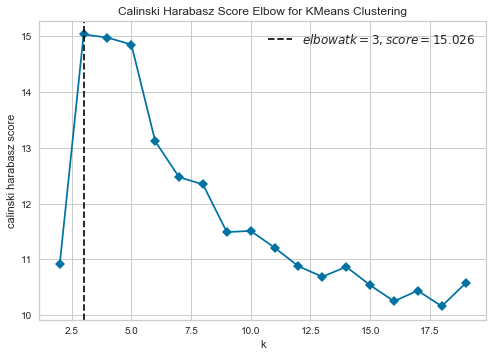

In [42]:
#ELBOW METHOD PARA DEFINIR EL MEJOR K
from yellowbrick.cluster import KElbowVisualizer
visualizer = KElbowVisualizer(
    km, k=(2,20), metric='calinski_harabasz', timings=False
)

visualizer.fit(dummies_venues_grouped_clustering)        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure

In [43]:
# set number of clusters
kclusters = 3
# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(dummies_venues_grouped_clustering)

In [44]:
# check cluster labels generated for each row in the dataframe
kmeans.labels_ 

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [45]:
dummies_venues_grouped.shape

(39, 235)

In [46]:
kmeans.labels_.shape

(39,)

In [47]:
dummies_venues_grouped_clustering["Labels"] = kmeans.labels_

In [48]:
dummies_venues_grouped_clustering

,Afghan Restaurant,Airport,Airport Food Court,Airport Gate,Airport Lounge,Airport Service,Airport Terminal,American Restaurant,Antique Shop,Aquarium,...,Trail,Train Station,Vegetarian / Vegan Restaurant,Video Game Store,Vietnamese Restaurant,Wine Bar,Wine Shop,Women's Store,Yoga Studio,Labels
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,...,0.000000,0.00,0.017544,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0
1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,...,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0
2,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,...,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0
3,0.000000,0.058824,0.058824,0.058824,0.117647,0.117647,0.117647,0.000000,0.000000,0.00,...,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0
4,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,...,0.000000,0.00,0.015625,0.000000,0.000000,0.015625,0.000000,0.00000,0.015625,0
5,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,...,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0
6,0.013333,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.013333,0.000000,0.00,...,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.013333,0.00000,0.026667,0
7,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.040000,0.000000,0.00,...,0.000000,0.00,0.020000,0.000000,0.000000,0.010000,0.000000,0.00000,0.000000,0
8,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,...,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0
9,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,...,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0


In [49]:
dummies_venues_grouped_clustering["Neighborhood"] = dummies_venues_grouped.iloc[:,0]

In [50]:
dummies_venues_grouped_clustering.sort_values("Neighborhood", inplace=True)

In [54]:
dummies_venues_grouped_clustering.set_index("Neighborhood", inplace=True)

In [52]:
data.sort_values("Neighborhood", inplace=True)

In [55]:
data.set_index("Neighborhood", inplace=True)

In [56]:
data1 = data.copy()
data2 = dummies_venues_grouped_clustering.copy()

In [57]:
data_final = pd.concat([data1,data2], axis=1)

In [65]:
data_final

,Neighborhood,index,Borough,Latitude,Longitude,Afghan Restaurant,Airport,Airport Food Court,Airport Gate,Airport Lounge,...,Trail,Train Station,Vegetarian / Vegan Restaurant,Video Game Store,Vietnamese Restaurant,Wine Bar,Wine Shop,Women's Store,Yoga Studio,Labels
0,Berczy Park,M5E,Downtown Toronto,43.644771,-79.373306,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.00,0.017544,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0
1,"Brockton, Parkdale Village, Exhibition Place",M6K,West Toronto,43.636847,-79.428191,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0
2,"Business reply mail Processing Centre, South C...",M7Y,East Toronto,43.662744,-79.321558,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0
3,"CN Tower, King and Spadina, Railway Lands, Har...",M5V,Downtown Toronto,43.628947,-79.394420,0.000000,0.058824,0.058824,0.058824,0.117647,...,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0
4,Central Bay Street,M5G,Downtown Toronto,43.657952,-79.387383,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.00,0.015625,0.000000,0.000000,0.015625,0.000000,0.00000,0.015625,0
5,Christie,M6G,Downtown Toronto,43.669542,-79.422564,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0
6,Church and Wellesley,M4Y,Downtown Toronto,43.665860,-79.383160,0.013333,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.013333,0.00000,0.026667,0
7,"Commerce Court, Victoria Hotel",M5L,Downtown Toronto,43.648198,-79.379817,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.00,0.020000,0.000000,0.000000,0.010000,0.000000,0.00000,0.000000,0
8,Davisville,M4S,Central Toronto,43.704324,-79.388790,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0
9,Davisville North,M4P,Central Toronto,43.712751,-79.390197,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0


In [59]:
data_final.reset_index(inplace=True)

In [60]:
# create map
map_clusters = folium.Map(location=[toronto_latitude, toronto_longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(data_final['Latitude'], data_final['Longitude'], data_final['Neighborhood'], data_final['Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[round(cluster-1)],
        fill=True,
        fill_color=rainbow[round(cluster-1)],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

# 4. EVALUATION - ANALYSIS

In [61]:
data_final.loc[data_final['Labels'] == 0, data_final.columns[[1] + list(range(5, data_final.shape[1]))]]

,index,Afghan Restaurant,Airport,Airport Food Court,Airport Gate,Airport Lounge,Airport Service,Airport Terminal,American Restaurant,Antique Shop,...,Trail,Train Station,Vegetarian / Vegan Restaurant,Video Game Store,Vietnamese Restaurant,Wine Bar,Wine Shop,Women's Store,Yoga Studio,Labels
0,M5E,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.00,0.017544,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0
1,M6K,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0
2,M7Y,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0
3,M5V,0.000000,0.058824,0.058824,0.058824,0.117647,0.117647,0.117647,0.000000,0.000000,...,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0
4,M5G,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.00,0.015625,0.000000,0.000000,0.015625,0.000000,0.00000,0.015625,0
5,M6G,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0
6,M4Y,0.013333,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.013333,0.000000,...,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.013333,0.00000,0.026667,0
7,M5L,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.040000,0.000000,...,0.000000,0.00,0.020000,0.000000,0.000000,0.010000,0.000000,0.00000,0.000000,0
8,M4S,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0
9,M4P,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0


In [62]:
data_final.loc[data_final['Labels'] == 1, data_final.columns[[1] + list(range(5, data_final.shape[1]))]]

,index,Afghan Restaurant,Airport,Airport Food Court,Airport Gate,Airport Lounge,Airport Service,Airport Terminal,American Restaurant,Antique Shop,...,Trail,Train Station,Vegetarian / Vegan Restaurant,Video Game Store,Vietnamese Restaurant,Wine Bar,Wine Shop,Women's Store,Yoga Studio,Labels
20,M4T,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1


In [63]:
data_final.loc[data_final['Labels'] == 2, data_final.columns[[1] + list(range(5, data_final.shape[1]))]]

,index,Afghan Restaurant,Airport,Airport Food Court,Airport Gate,Airport Lounge,Airport Service,Airport Terminal,American Restaurant,Antique Shop,...,Trail,Train Station,Vegetarian / Vegan Restaurant,Video Game Store,Vietnamese Restaurant,Wine Bar,Wine Shop,Women's Store,Yoga Studio,Labels
27,M5N,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
